In [33]:
# Test handling of CO2 3d data
import sys
import os
sys.path.append(os.path.expanduser('~/scripts/utils_cmip7'))
# from analysis_legacy import try_extract

In [34]:
from analysis import try_extract
from utils_cmip7.io import stash
from utils_cmip7.processing import compute_annual_mean
from utils_cmip7.processing.spatial import global_mean_pgC

In [35]:
from utils_cmip7 import config
from utils_cmip7.config import VAR_CONVERSIONS

In [36]:
import iris
file = '~/annual_mean/xqchk/xqchk.field1564_mm_hyb.monthly.nc'
cubes = iris.load(file)

/user/home/nd20983/iris/lib64/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1204: _WarnComboIgnoringCfLoad: Ignoring invalid units 'days since 1750-12-00 00:00:00' on netCDF variable 't'.
  warnings.warn(
/user/home/nd20983/iris/lib64/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1204: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' on netCDF variable 'hybrid_p_x1000'.
  warnings.warn(


In [ ]:
cube = try_extract(cubes, 'co2', stash_lookup_func=stash)
cube[0]

<iris 'Cube' of CO2 3D TRACER      MASS MIXING RATIO / (kg m-2 s-1) (t: 3168; hybrid_p_x1000: 19; latitude: 73; longitude: 96)>

In [10]:
# results = global_mean_pgC(cube[0], 'co2')
# results
var = 'Total co2'
from iris.analysis.cartography import area_weights
if cube is None:
    raise ValueError("None cube passed to global_mean_pgC()")
# Handle CubeList input
if isinstance(cube, iris.cube.CubeList):
    if not cube:
        raise ValueError("Empty CubeList passed to global_mean_pgC()")
    cube = cube[0]  # Get first cube in CubeList
for name in ("latitude", "longitude"):
    coord = cube.coord(name)
    if not coord.has_bounds():
        coord.guess_bounds()
weights = area_weights(cube)
gm = cube.collapsed(["latitude", "longitude"], iris.analysis.MEAN, weights=weights)
gm.data = gm.data * VAR_CONVERSIONS[var]


/user/home/nd20983/iris/lib64/python3.11/site-packages/iris/analysis/cartography.py:435: IrisDefaultingWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn(


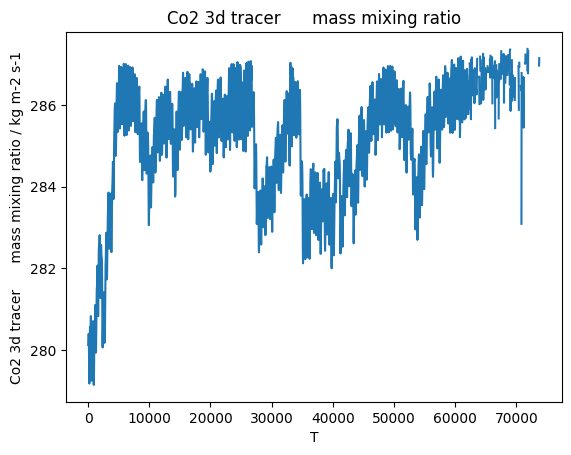

In [29]:
# plot gm.data timeseries
import iris.quickplot as qplot
qplot.plot(gm[:,0])

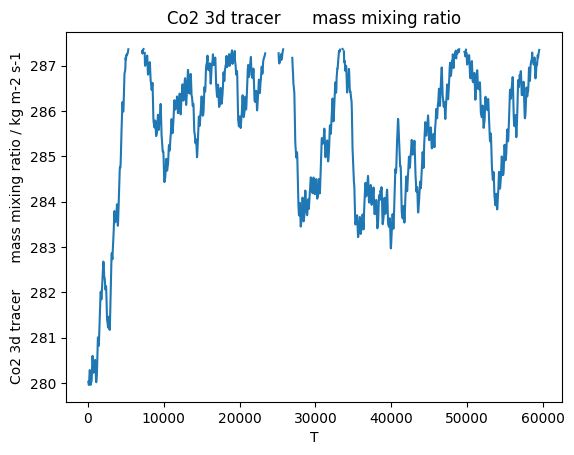

In [32]:
qplot.plot(gm[:,-1])